In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


# Load and Check Data

In [2]:
train_df = pd.read_csv(r"C:\Users\lenovo\Desktop\Train.csv","r",delimiter=',')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df = pd.read_csv(r"C:\Users\lenovo\Desktop\test.csv","r",delimiter=',')

In [5]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
test_PassengerID = test_df["PassengerId"]

In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Categorical Variable

In [12]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue)) 

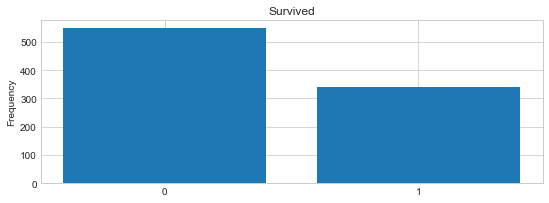

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


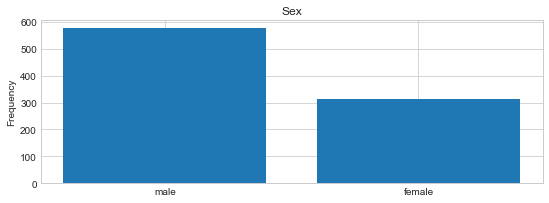

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


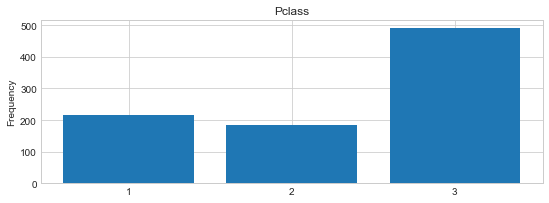

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


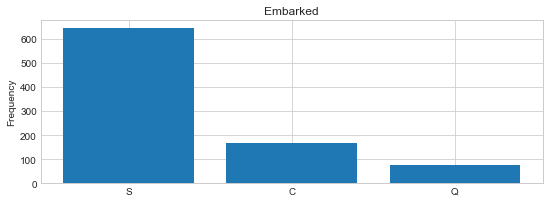

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


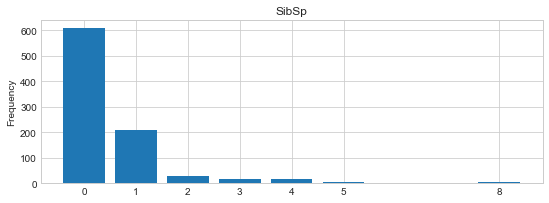

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


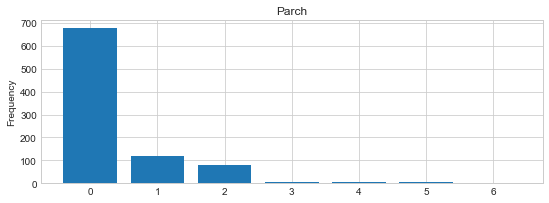

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [13]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]

for c in category1:
    bar_plot(c)

In [14]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
D              3
              ..
B71            1
E46            1
C91            1
C103           1
D47            1
Name: Cabin, Length: 147, dtype: int64 

Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)    1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)          1
Hirvonen, Miss. Hildur E                                     1
Davis, Miss. Mary                                            1
Skoog, Miss. Mabel                                           1
                                                            ..
Fischer, Mr. Eberhard Thelander                              1
Silvey, Mrs. William Baird (Alice Munger)                    1
O'Leary, Miss. Hanora "Norah"                                1
Harper, Mrs. Henry Sleeper (Myna Haxtun)                     1
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)            1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601       

# Numerical Variable

In [15]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
    

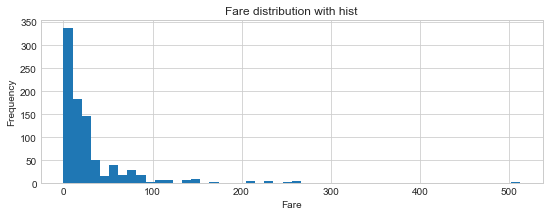

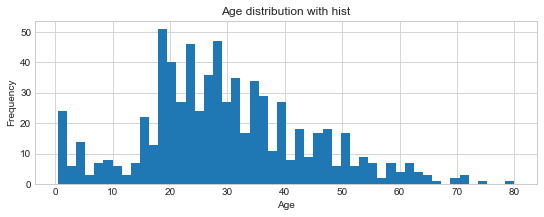

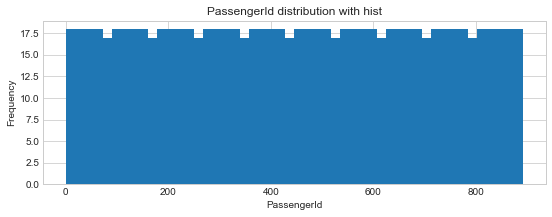

In [16]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

# Basic Data Analysis

* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [17]:
# Plcass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [19]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [21]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Outlier Detection

In [22]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st Quartile
        Q1 = np.percentile(df[c],25)
        # 3rd Quartile
        Q3 = np.percentile(df[c],75)
        # IQR 
        IQR = Q3 - Q1 
        # Outlier Step
        outlier_step = IQR * 1.5
        # Detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [23]:
train_df.loc[detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


# Missing Value

* Find Missing Value
* Fill Missing Value

In [24]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Find Missing Value

In [26]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [27]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Fill Missing Value

* Embarked has 2 missing value
* Fare has only 1

In [28]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


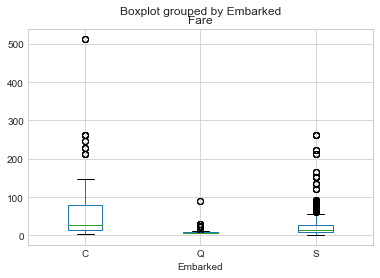

In [29]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [30]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [31]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [32]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [33]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Visualization

* Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived

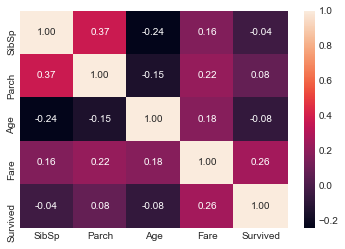

In [34]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

* Fare feature seems to have correlation with survived feature (0.26)

# SibSp -- Survived

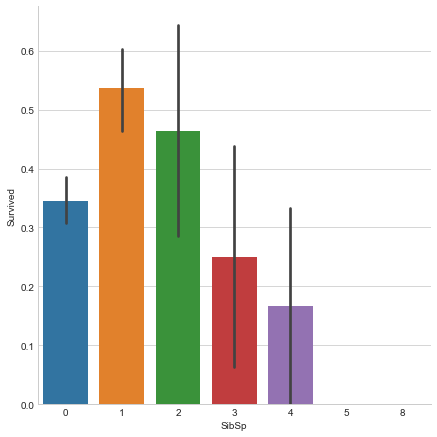

In [35]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)

* Having a lot of SibSp have less chance to survive.
* if sibsp == 0 or 1 or 2, passenger has more chance to survive
* we can consider a new feature describing these categories.
* Having less of SibSp have a lot chance to survive.

# Parch -- Survived

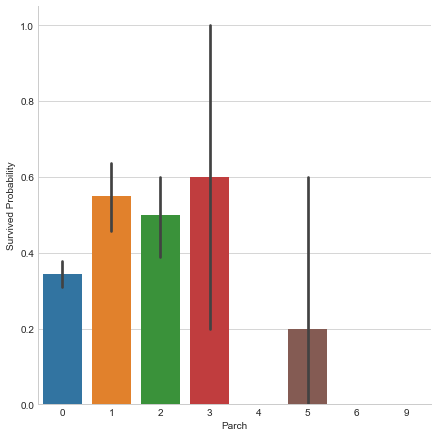

In [36]:
g = sns.factorplot(x="Parch", y = "Survived", kind = "bar", data = train_df, size = 6)
g.set_ylabels("Survived Probability")
plt.show()

* Sibsp and parch can be used for new feature extraction with th = 3
* small familes have more chance to survive.
* there is a std in survival of passenger with parch = 3

# Pclass -- Survived

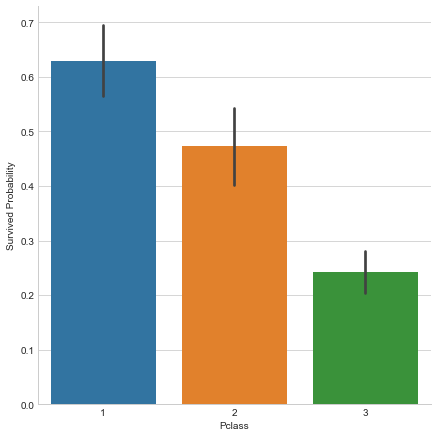

In [37]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

* Pclass 1 have a lot survived probability.

# Age -- Survived

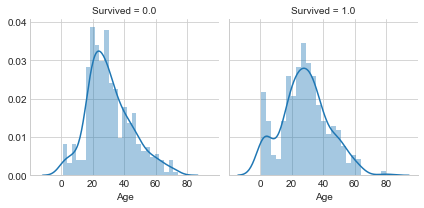

In [38]:
g = sns.FacetGrid(train_df,col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passengers are in 15-35 age range,
* use age feature in training
* use age distribution for missing value of age

# Pclass -- Survived -- Age

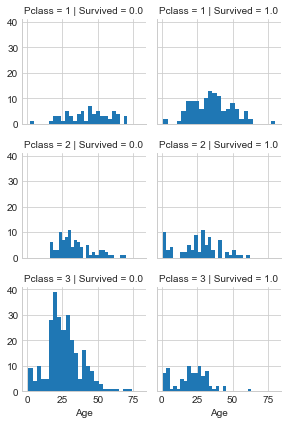

In [39]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", size = 2 )
g.map(plt.hist,"Age", bins = 25)
g.add_legend()
plt.show()

* Plass 3 have less survived and have died rate in their 20s ages.
* pclass is important feature for model training.

# Embarked -- Sex -- Pclass -- Survived

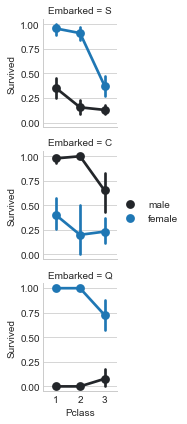

In [40]:
g = sns.FacetGrid(train_df, row = "Embarked", size = 2)
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* males have better survival rate in pclass 3 in C.
* embarked and sex will be used in training.

# Embarked -- Sex -- Fare -- Survived

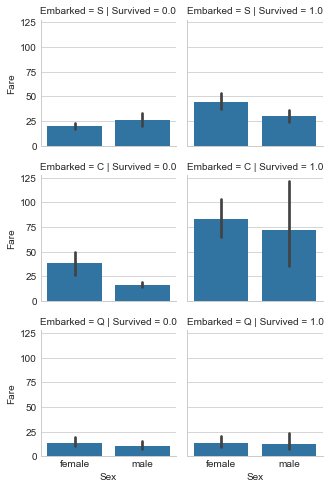

In [41]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

* Passsengers who pay higher fare have better survival.
* Fare can be used as categorical for training
* Embarked C seems to have a lot survived rate

# Fill Missing: Age Feature

In [42]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


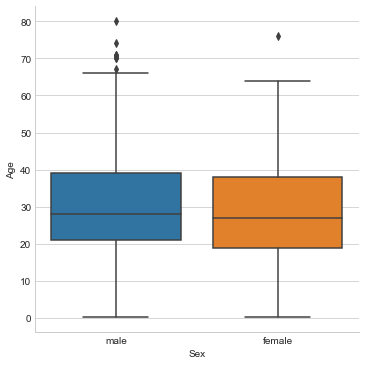

In [43]:
sns.factorplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

* Sex is not informative for age prediction, age distribution seems to be same.

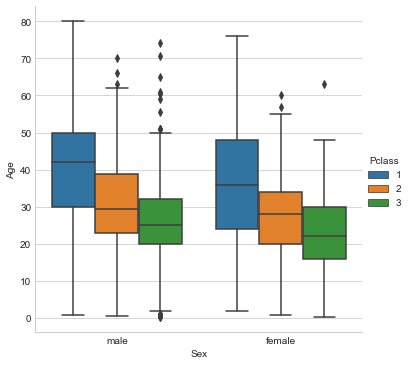

In [44]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

* 1st class passengers are older than 2nd, and 2nd is older than 3rd class.

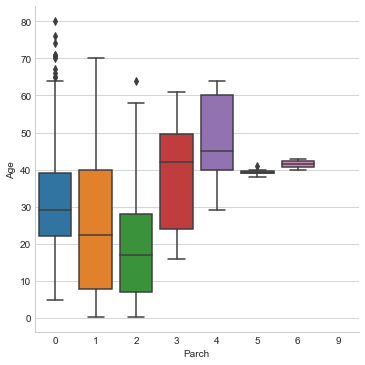

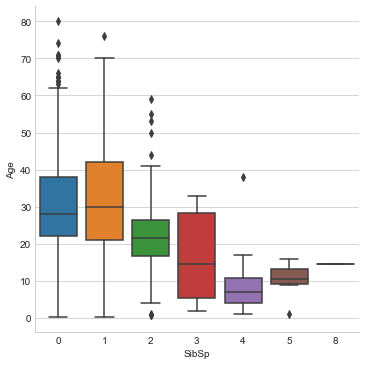

In [45]:
sns.factorplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

In [46]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

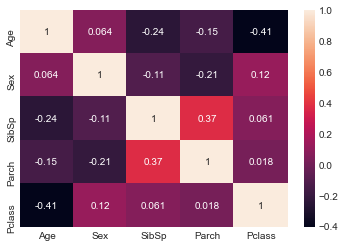

In [47]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

* Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [48]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [49]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
